# Delivery 1 - Bouncer by Daniel Bruna and Daniel Peco

## 1. Introduction

### Aim of the notebook
In this notebook, we will explain how the Bouncer scene in the project ml-agents works and show all the different paremeters you can mess around with and their respective analysed outcomes with the help of tensorboards.

Furthermore, we will also modify the case to make a new one which involves more complexity and challenge to the agent.

### Team involved

 - Daniel Bruna Triviño (danielbrunatrivino@enti.com) 
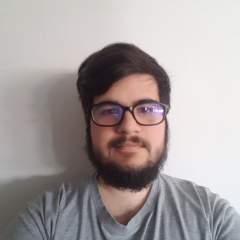
    
- Daniel Peco Regales (danielpecoregales@enti.com)
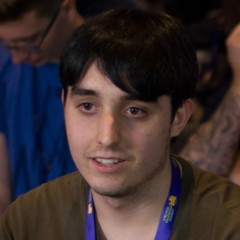

## 2. Case analysis

### Brief introduction of the example:
The Bouncer example in the ML_Agents repo is a very simple case where an agent has to catch a banana mid air by jumping from one place to another. When you dive into the code that allows the agent to learn and decide the right actions you will see that it’s as simple as it can be, but we will explain it step by step so that you can modify it at your will after reading this.

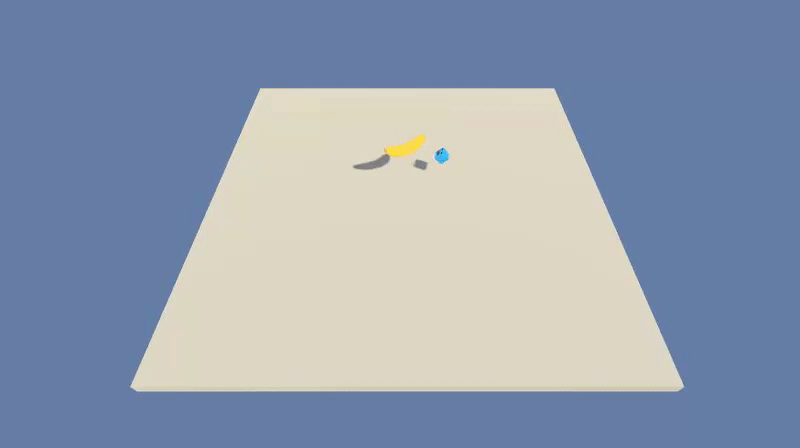


### How does the agent work?
#### Actions, States and Rewards

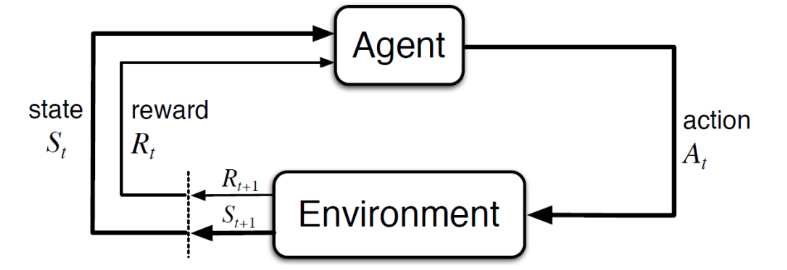

This simple agent can only do one single thing, jump in the direction he chooses, and can only see what we call “States”, which in this case there are just two of them: its own position and the position of his target, the banana. Simple enough, right?
Both of these aspects of the agents are defined in the BouncerAgent.cs script. What an agent can see is in the CollectObservations method of that script and what an agent can do is in the AgentAction method.

#### How does it learn?
This agent, like all the others, learn by trial and error by receiving a state, his position and the banana’s in our case, and deciding in which direction to jump by itself. With enough experience he will be able to take that banana in a couple of jumps every time.
If you take a look at the AgentAction method you will see that the agent receives an array of floats called “vectorActions”. This is what the brain decided that was the direction to jump for that precise state he collected from the observations. How can he know? like we said earlier: experience. At first it will choose a random direction until he randomly stumbles into his goal and starts making relation between observations and actions and rewards he is given.

We have a new challenger: Rewards.
There are three different rewards in this example: Two in the BouncerAgent.cs and one in the BouncerBanana.cs. They are passed to the agent with the AddReward(float) method.

For an agent to know what he’s doing right or wrong you need to tell him. We called it the carrot and stick technique, if he does something well you give him a carrot and if he makes something bad you give it the stick. For a computer the carrot and stick might not be as effective so we use numbers, and computers love their numbers.
In this case when he collisions with the banana we give it a +1 reward but when he falls off the platform we give it a -1. Additionally if he makes an action,  it receives a negative reward too, this one is a little bit more complex.

The reward he gets every time he makes an action, in this case a jump, is the following:
-0.05 * ((vectorActions[0] * vectorActions[0] + vectorActions[1] * vectorActions[1] + vectorActions[2] * vectorActions[2]) / 3)
This takes into account the direction he jumps but maintaining it between 0 and 1 and then multiplying by -0.05 for it to be small in comparison to the other two rewards and to be negative. Why negative? Because if it were positive you would encourage the agent to jump infinitely, and in general that is not the goal. It would if you wanted him to not fall off a pogostick but this is not the case.

`WARNING: IF YOU WANT TO CHANGE THIS REWARD, OR ANY REWARD IN THIS EXAMPLE, IT HAS TO BE BETWEEN -1 AND 1 OR IT WILL MOST PROBABLY NOT WORK SINCE ALL REWARDS VALUES MUST BE NORMALIZED AS IT IS SET IN THE training_config.yaml FILE IN THE ML-AGENTS config FOLDER WITH THE normalize: true PARAMETER.`

Now that you have a more general understanding of how this agent works internally let’s dive into the more practical stuff: training it.

#### How to train it?
The scene Bouncer is the one you are going to use in order to test and train your bouncer agent.
ML_Agents provides a brain which has already been trained for you to have something to compare your trainings to. The set up with which the scenes comes is for you to play with the bouncer as a Player with a brain called BouncerPlayer. This allows you to play as the agent, not really useful at the moment so we will have to change the brain.
In the scene there are multiple Environment gameObjects with an Agent gameObject parented inside. We will use the one that is Active. Click on the Agent gameObject and look for the brain parameter at the top of the BouncerAgent.cs component. Change that brain for the one called BouncerLearning.

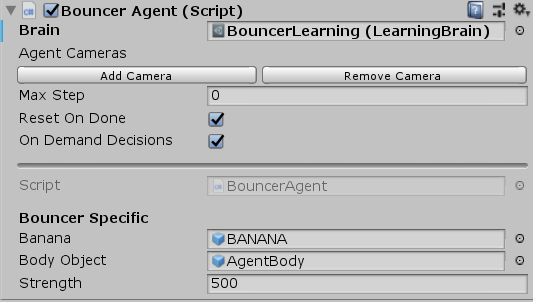


Now go to the Academy gameObject and in the BouncerAcademy.cs look for the BroadcastHub at the top that has that BouncerLearning brain on the list. Next to it there’s a checkbox called “control”. If you want to see how the agent plays by itself once trained make sure that it is UNCHECKED. Since we want to test if things work be sure to leave it unchecked. If it was done correctly by pressing play you should be able to see the agent move by itself jumping around and picking up the banana.

You have seen an already trained brain, now is time to train your own!
When you have done the training we will explained next you will need to do a couple extra steps before doing what we just explained in order to test your newly trained agent.

`Notice: For this training we will not modify the rewards so that you can compare your result with the one you just saw but you can do that afterwards.`

##### 1. Duplicating and assigning a new brain to the agent
Go to the folder "Brains" and duplicate the brain named BouncerLearning and change its name to MyBouncerLearning  for example.

Now you will need to go to the `training_config.` file I mentioned in the warning for the rewards and duplicate the BouncerLearning section with the four parameters inside included and change the name to match the new brain you created. This is very important or else once you start training it will take the default parameters and will cause some problems. Before leaving this file change the max_steps parameter in the section you created to be 50e3 instead of 5e5 so that you only do 50.000 steps instead of 500.000 which is too many.

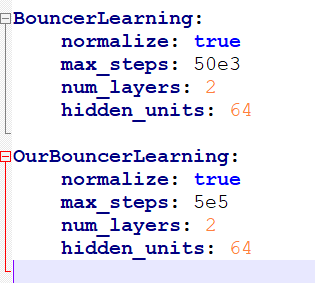

Back to the editor, go to the same Agent gameObject as before and drag this new brain to the Brain parameter in the BouncerAgent.cs component.

After that you will need to go to the Academy gameObject, look for the BouncerAcademy.cs component and drag that same brain to the space where the BouncerLearning brain is in the Broadcast Hub and check the Control checkbox that appears next to it. This checkbox allows for external control of that brain in order to train, once trained you will need to uncheck this checkbox in order to see the result of the training.

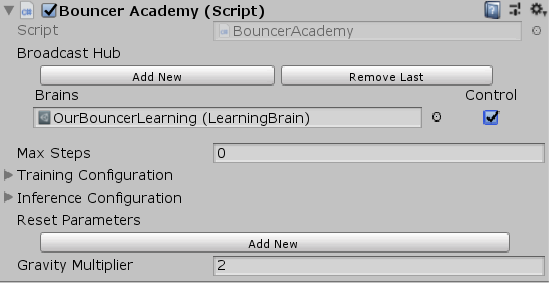


##### 2. Starting the training

You need a Anaconda Command Prompt opened and go, using the "cd PATH" command, to the base ml-agents folder. It will have a folder named config, UnitySDK, etc…

Once in here run the following commands:

`--> activate ml-agents`

`--> mlagents-learn config/trainer_config.yaml --run-id=314 --train`

You can change the "314" for any name you want, it will be the name of the file with the agent's training results. 
For example you could put: `mlagents-learn config/trainer_config.yaml --run-id=MyTraining --train`
`Notice: The trainer_config.yaml is the same file you modified earlier.`

Once you enter that last command, after a couple of seconds, a Unity logo will appear and you will have a message asking you to press the Play button in unity in order to start. Press it and your agent will start training until done with all the steps defined in the `trainer_config.yaml` file. When it is the console will stop writing allowing you to enter new commands, this means you are done training.

If you want to stop it before it’s done with all the steps just press Play in the editor again and it will save your progress and stop the training.

`WARNING: IF YOU FORGET TO CHANGE THE RUN-ID PROPERTIE OF THE COMMAND AND YOU REDO A TRAINING WITH THE SAME RUN-ID YOU WILL OVERRIDE THE PREVIOUS TRAINING, SO BE CAREFULL.`

##### 3. Applying the results

In the base folder of ml-agents you used for the cd command before there's a models folder. Enter it and you will find a folder with the name you put as the run-id in the training command. Drag this folder to Unity Asset folder. Put it inside a MyModels folder for example if you plan on making more trainings so that it is more organized.

Once this is done you have to look for the brain you duplicated in the first step and look for the model parameter and drag the .bytes file inside that folder you dragged earlier. This .byte file is the result of your training.
Lastly go to the Academy and uncheck that control checkbox next to your brain like explained at the end of the first step.

If everything was done correctly, at this point you should be able to press Play in the Unity Editor and see your agent move by itself. if not check all the steps to see if you unckecked the control box for the correct brain since the Academy can have multiple brains listed at once.



### Imitation Learning

Next to the Bouncer scene you might have noticed another scene called BouncerIL. In case you were wondering which was the purpose of that scene, it is to train the agent with Imitation Learning.

Which is the main difference with the previous method to train the agent?
Well, even though you might’ve figured out already by the name of this method, the agent learns by imitating another agent that already knows the right action in every state to grab the banana in the most optimal way possible, which in this case… it can be you!

Exactly, the agent will finally forget about those rewards to find out which action is better because he can just observe you and record your action/decisions for every state. We could say that this method makes the agent learn way faster than the previous one since there is no need to explore which actions will give positive rewards, of course, the final result might be worse in the long run since it’s hard to perform the most optimal action every single time. Think of it as a teacher and a student, the teacher has the experience and the student tries to find a way to imitate what the teacher does in multiple situations, of course the result might not be the best since the student only imitates and does not train from exploring different situations and learning from them.

Notice: An idea might pop up in your head by now, what if I use an already trained agent to be the teacher instead of playing myself? We thought that at first too. This may look like the better way to get the best result possible but we realized we were wrong. 
Think about it, if you have an already trained agent and use it to teach another one with Imitation Learning you would get, at best, a perfect imitation of the teacher. There is no need to go through this process just to get the same result, you have that best result trained already.
The interesting thing is to train it by playing yourself the role of teacher and making the two agents, the one that learned by Imitation Learning and the one you trained before. You will be able to see the difference of the two methods.

#### How to train it via Imitation Learning
Assuming you know how most elements in the training scene work from the tutorial of the last method, you wanna know that there are only two environments in this BouncerIL scene: the TeacherEnvironment and the StudentEnvironment (we will call them Teacher and Student from now on). Both environments are, at its core, exactly the same. The only difference between both will be the brain of each agent in them, since the Student agent will do the imitation learning from the Teacher agent.

So, how do we set up the scene? Well, it’s really simple. When it comes to the Teacher, you need to make sure the brain used by the agent is BouncerPlayer, so that you are able to control the direction of every jump with the keys “WASD”.

For the student, the process is really similar to the initial example. You can make your own new brain and add it to the agent of the environment by duplicating BouncerLearning and renaming it with a new name, like BouncerLearningIL.

Setting up the academy gameobject needs an extra step than last time. Since you have two different brains at the same time in two differents environments, you have to drag them into the Broadcast Hub. Remember to also check the Control checkbox next to BouncerLearningIL! It’s the brain you want to train.

Remember when you modified `trainer_config.yaml`? Well, we’re not going to use that one anymore. Next to it, you might also see online_bc_config.yaml. The steps are kinda similar though, go search the BouncerLearning section and change the name to the one you previously used (in our case it will be BouncerLearningIL). When it comes to the parameters that you can find inside, you might wanna make sure that brain_to_imitate is the brain that is being used in the Teacher environment, in our case is BouncerPlayer.

We are set to go and start the training!

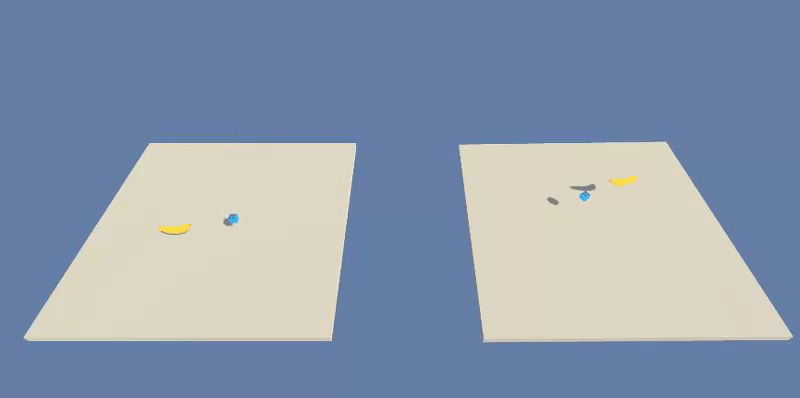


The remaining process is almost exactly the same as the last time. Though, once you make it to the path of the project in Anaconda Prompt and activate ml-agents, the end of the train command changes just a little bit:

`--> mlagents-learn config/online_bc_config.yaml --run-id=BouncerIL --train --slow`

You may have been wondering about how you will be able to control the Teacher agent since the training scene goes THAT fast when the training starts. Well, adding “--slow” at the end of the command makes the scene go at its actual standard runtime so you’re able to actually play at the standard pace.

The good thing about using `online_bc_config.yaml` is that you can notice the improvement of the Student agent over time (thing that `offline_bc_config.yaml` doesn’t) and you can stop the training whenever you feel like it or you reach the maximum steps that was set. The results of the training will also be found at the models folder, so you can get the folder with the run ID you used and see the results of the training by imitating you!



## 3. Performance analysis

### Parameters

As seen before, there are a lot of parameters to tweak in trainer documents such as `trainer_config.yaml` which might show different results at the end of the training. We will go over the ones we consider the most important or worth enough to experiment with:

#### Learning rate:
This parameter sets how much value gives the agent for every action during the training. This means that the lower this parameter is, the slower the agent will learn. This number shouldn’t be too high either, since the agent has to explore and if he settled with the first few possible possible actions that give him a positive reward, he might not eventually learn the most optimal one, making the agents with a smaller learning rate smarter in the long run. This parameter is set to 0.003 at the beginning.

#### Max steps:
We could say this is the easiest one to understand why there is a difference. The higher this parameter is, the longer the agent will train in the environment to find the most optimal action in every state. This parameter is set to 50,000 steps at the beginning.

#### Hidden units:
Hidden units allows the agent to add more complexity and recombinations of the input factors so it can come up with differents solutions. This means that the agent could have a harder time coming up with more solutions and then, finding the most optimal action. This paramater is initially set at 64.

#### Normalize:
This is a bool parameter that you have to make sure it is set to true. It makes sure everything in the training is normalized which results in a successful training, unlike when we tried to train our agent with the normalize parameter on false.

### Tweaking parameters:
After introducing these parameters, the first thing we came up is raising up a bit the learning rate to 0.005, since 0.003 felt too low and our training results were far from what we were expecting (averaging a mean reward of 1). We also wanted to test if 50,000 steps were really enough for the agent to learn how to get the banana with the least number of jumps as possible, so we trained the agent for 450,000 steps. The following graphic is a comparison between training the agent for 450k steps (orange line) and 50k steps (blue line):

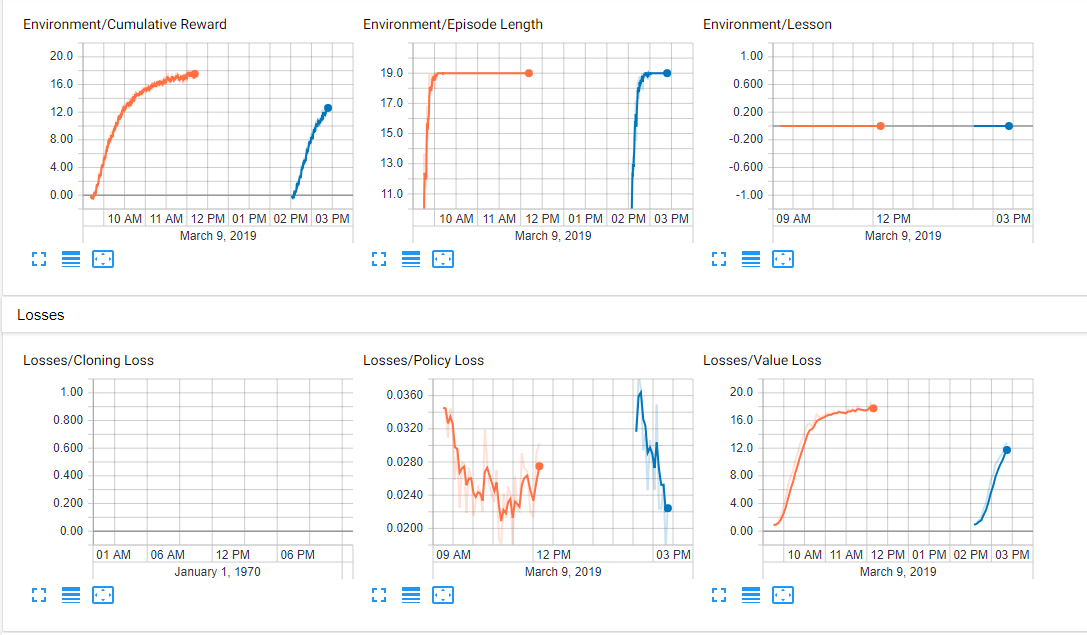

As you can see, there is a point where it’s not really worth it to keep training. After around 100k steps, the cumulative reward and episode length won’t keep raising that much and it looks like the agent already found how to get the banana as good as the end of the training. After all, the practical difference with both results didn’t look that different from each other. So we can conclude a really good way to train our agent is to set the Max Steps around 100k and a learning rate of 0.005.

These are the results for the tensorboard with Imitation Learning, as expected, the agent learns in 15 minutes as much as the previous agent did in the period of 1 hour. As expected in theory, we observed that the cumulative reward started to get stable around the 10-12, while as seen before, it can reach a mean reward of 16-18. This is an easy evidence of how imitation learning clearly is fast but might not be the best way to train the most optimal agent:

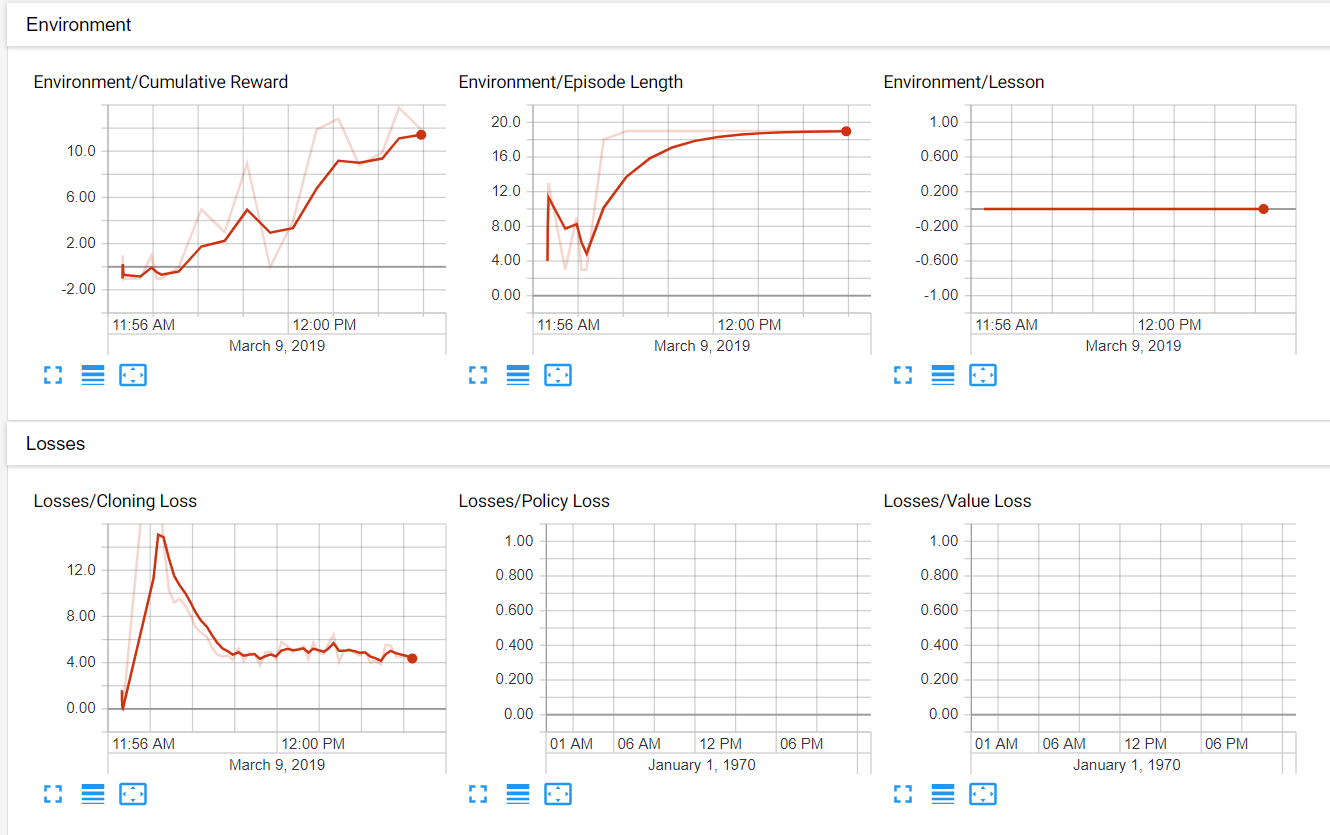


### Tweaking rewards:
One factor we also experimented with a lot is how the moving reward was given to the agent. Initially, it was set to be done with this way: 

`AddReward(-0.05f * (
            vectorAction[0] * vectorAction[0] +
            vectorAction[1] * vectorAction[1] +
            vectorAction[2] * vectorAction[2]) / 3f);`

And we thought about how the training would change with the following tweaks:

#### DistanceReward

`AddReward(-0.05f*Vector3.Distance(gameObject.transform.localPosition, banana.transform.localPosition));`

This one just multiplies the distance between agent and goal for the standard -0,05. This makes it so the negative reward gets bigger when the agent is further from the banana. Our result here was that the agent would jump to the opposite direction of the banana and would fall of the platform, our issue here could be that the resulting reward could be higher than 1, meaning that this value wasn’t normalized and it caused the training to fail.
        
#### InverseDistanceReward
`AddReward(-0.05f*(1/Vector3.Distance(gameObject.transform.localPosition, banana.transform.localPosition)));`

Exactly the previous case except the distance gets inversed. This one solved the normalized issue (except when the agent is too close, which hardly ever happens), even though, the result was still far from optimal compared to the initial reward system.

#### SimpleReward
 
`AddReward(-0.05f);`
       
Just a negative 0,05 every time the agent jumps, this just means that the agent has to take care about jumping the least possible. The results were very similar to InverseDistanceReward.

#### DistancePerBasicReward        

`AddReward(-0.05f * (1/Vector3.Distance(gameObject.transform.localPosition, banana.transform.localPosition)) * ((
            vectorAction[0] * vectorAction[0] +
            vectorAction[1] * vectorAction[1] +
            vectorAction[2] * vectorAction[2]) / 3f));`
            
The initial one except we also multiply the inverse of the distance to the formula. We found it was the one that could come closer to the initial one, but we couldn’t find any sign that proves it actually improved the results of the training.




## 4. New case proposal

We came up with a couple different scenarios where the logic of this agent could be used to train it in a different environment. We think the most applicable and expandable one is the following:

Since our agent learns with observations such as his position and his target we could apply it to make him go from one place to another. That is easy, he already does that. But, if you add the position of a bonus reward, let’s say a coin, in the middle of its path with a boost in reward he should start going for the reward first and then going for the main target (the finish line for example). That is the hypothesis at least.

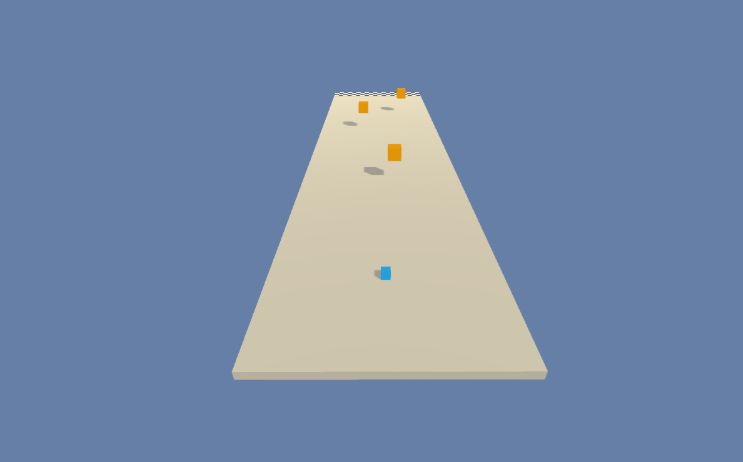

The actions the agent can take are the same: jump in a direction he decides. The states change since we add the position of the closest coin from the agent to the goal. We have to change the parameters the brain is expecting to get. If you go to the brain you are going to use for this example you need to open the parameter section and change the Space size to 9 since we add another 3 floats to the observations.

We will need a coin manager to be able to control which coin’s position we give to our agent. In this case we will suppose you only train one agent at a time so we will use a Singleton for this script and avoid dragging references later.  We will give you the entire code after explaining how the logic of it works, don’t worry.
The list of coins consist of a Transform for the position and a bool to know if it was collected or not.
The objective of this script is to know every coin’s position and choose the closest one to the agent that is between the agent and its goal. We will use vectors and angles for that, we check if the angle between the vector that goes from the agent to its goal and from the agent to a coin is between [-90, 90] degrees.
For every coin that meets that condition we calculate its distance to the agent and check if the previous coin’s distance was smaller. Plain old closest object calculations.
It’s important that when no coins are detected we set the target position for a coin to the goal one so that the agent goes to the end instead of circling an unexisting coin.
This method will be called once every time the agent makes an action and when he collects a coin.

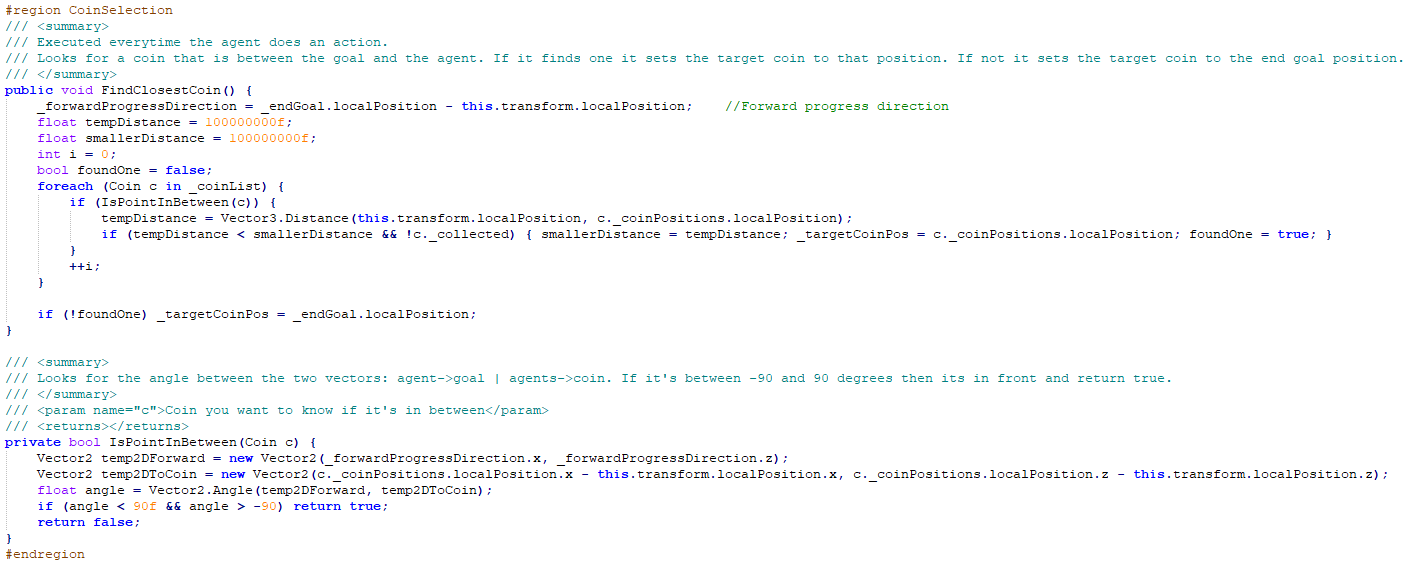

Once we have that sorted we need something that calls this method every time a coin is collected. We create a public function that receives the Transform from the coin that has been collected. We look for it in our list and set its bool attribute to true to mark it as collected and call our previous function for looking for another coin that has not been collected yet.

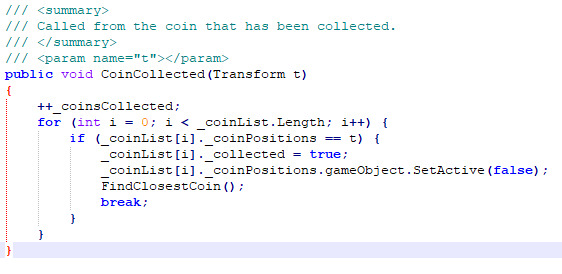

In the restart function we create now you need to restart every coin’s attribute to the default and find the new closest coin after the rest.

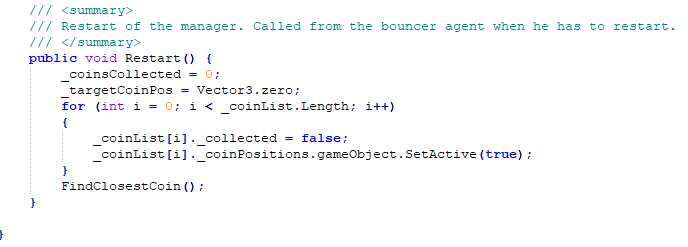

Finally, the BouncerAgent.cs has to get a little adjustment. Duplicate it and change both the file name and the class name so that they match, NewBouncerAgent.cs for example.
You need to change the reward he gets every time the agent does an action. The agents has to know that he is approaching its goal so he needs to get a reward that tells him he progresses forward. We will use the same basic calculation it has now but change it a bit.
If he is going forward we will give a positive reward of +0.05 multiplied by the distance he did between his last action and this one. But if he goes backwards we do the same thing but with a -0.05 instead.

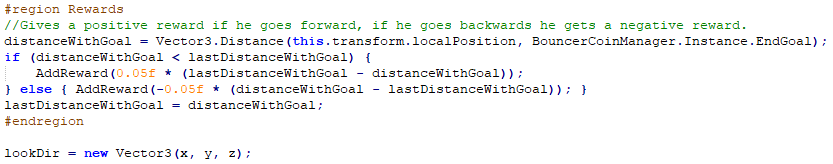

Now comes how to train it. You need to go to the Agent gameObject of your scene and change the BouncerAgent.cs component for your newly created NewBouncerAgent.cs. Copy the parameters you had in the previous one and drag a new brain to the brain slot in the component.

After change the scene a bit so that it looks like the image at the start of this section add the BouncerCoin.cs component to the yellow cubes and the BouncerGoal.cs component to the goal at the end.

Once that is done you just have to repeat the steps you did to train your first agent explained in the first part of the Case Analysis section.Next will be the reward the coin and the goal give, it’s the same as the banana does in the bouncer example we covered. If the agent collides with it you give it a positive reward. With a +1 should be enough but you can tweak that and try to get different results. 
What you have to do is create a new script, let’s call it BouncerCoin.cs and BouncerGoal.cs, for your coin and copy the OnTriggerEnter function in BouncerBanana.cs but with a little change. The Respawn() has to be changed for the CoinCollected method we defined earlier by using the Instance of the BouncerCoinManager.cs instance.

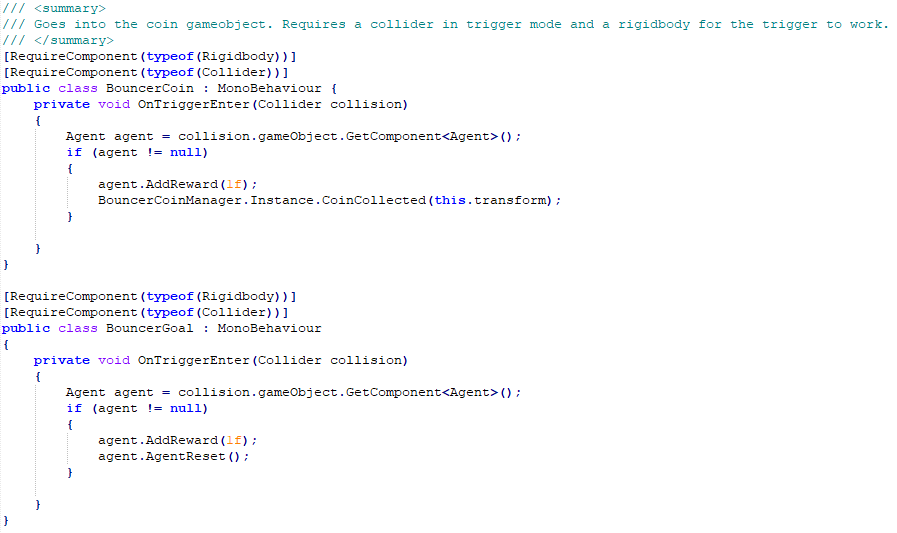



## Annex

### Code for new case proposal

In [ ]:
using System.Collections;
using System.Collections.Generic;
using UnityEngine;
using MLAgents;

/// <summary>
/// Goes into the Agent gameObject.
/// </summary>
public class BouncerCoinManager : MonoBehaviour
{
    static BouncerCoinManager _instance;

    #region Attributes
    [System.Serializable]
    public struct Coin { public Transform _coinPositions; public bool _collected; };

    [SerializeField]
    private Coin[] _coinList;

    [SerializeField]
    private Transform _endGoal;
    
    private Vector3 _forwardProgressDirection;

    private Vector3 _targetCoinPos;
    private int _coinsCollected = 0;
    #endregion

    #region Getters
    static public BouncerCoinManager Instance {
        get { return _instance; }
    }

    public Vector3 TargetCoin {
        get { return _targetCoinPos; }
    }

    public Vector3 EndGoal
    {
        get { return _endGoal.localPosition; }
    }
    #endregion

    #region Initialisation
    private void Awake()
    {
        _coinsCollected = 0;
        _targetCoinPos = Vector3.zero;
        for (int i = 0; i < _coinList.Length; i++)
        {
            _coinList[i]._collected = false;
        }
        _forwardProgressDirection = _endGoal.localPosition - this.transform.localPosition;    //Forward progress direction
    }

    private void Start()
    {
        FindClosestCoin();
    }
    #endregion

    /// <summary>
    /// Called from the coin that has been collected.
    /// </summary>
    /// <param name="t"></param>
    public void CoinCollected(Transform t)
    {
        ++_coinsCollected;
        for (int i = 0; i < _coinList.Length; i++) {
            if (_coinList[i]._coinPositions == t) {
                _coinList[i]._collected = true;
                _coinList[i]._coinPositions.gameObject.SetActive(false);
                FindClosestCoin();
                break;
            }
        }
    }

    #region CoinSelection
    /// <summary>
    /// Executed everytime the agent does an action.
    /// Looks for a coin that is between the goal and the agent. If it finds one it sets the target coin to that position. If not it sets the target coin to the end goal position.
    /// </summary>
    public void FindClosestCoin() {
        _forwardProgressDirection = _endGoal.localPosition - this.transform.localPosition;    //Forward progress direction
        float tempDistance = 100000000f;
        float smallerDistance = 100000000f;
        int i = 0;
        bool foundOne = false;
        foreach (Coin c in _coinList) {
            if (IsPointInBetween(c)) {
                tempDistance = Vector3.Distance(this.transform.localPosition, c._coinPositions.localPosition);
                if (tempDistance < smallerDistance && !c._collected) { smallerDistance = tempDistance; _targetCoinPos = c._coinPositions.localPosition; foundOne = true; }
            }
            ++i;
        }

        if (!foundOne) _targetCoinPos = _endGoal.localPosition;
    }

    /// <summary>
    /// Looks for the angle between the two vectors: agent->goal | agents->coin. If it's between -90 and 90 degrees then its in front and return true.
    /// </summary>
    /// <param name="c">Coin you want to know if it's in between</param>
    /// <returns></returns>
    private bool IsPointInBetween(Coin c) {
        Vector2 temp2DForward = new Vector2(_forwardProgressDirection.x, _forwardProgressDirection.z);
        Vector2 temp2DToCoin = new Vector2(c._coinPositions.localPosition.x - this.transform.localPosition.x, c._coinPositions.localPosition.z - this.transform.localPosition.z);
        float angle = Vector2.Angle(temp2DForward, temp2DToCoin);
        if (angle < 90f && angle > -90) return true;
        return false;
    }
    #endregion

    /// <summary>
    /// Restart of the manager. Called from the bouncer agent when he has to restart.
    /// </summary>
    public void Restart() {
        _coinsCollected = 0;
        _targetCoinPos = Vector3.zero;
        for (int i = 0; i < _coinList.Length; i++)
        {
            _coinList[i]._collected = false;
            _coinList[i]._coinPositions.gameObject.SetActive(true);
        }
		FindClosestCoin();
    }

}

/// <summary>
/// Goes into the coin gameobject. Requires a collider in trigger mode and a rigidbody for the trigger to work.
/// </summary>
[RequireComponent(typeof(Rigidbody))]
[RequireComponent(typeof(Collider))]
public class BouncerCoin : MonoBehaviour {
    private void OnTriggerEnter(Collider collision)
    {
        Agent agent = collision.gameObject.GetComponent<Agent>();
        if (agent != null)
        {
            agent.AddReward(1f);
            BouncerCoinManager.Instance.CoinCollected(this.transform);
        }

    }
}

[RequireComponent(typeof(Rigidbody))]
[RequireComponent(typeof(Collider))]
public class BouncerGoal : MonoBehaviour
{
    private void OnTriggerEnter(Collider collision)
    {
        Agent agent = collision.gameObject.GetComponent<Agent>();
        if (agent != null)
        {
            agent.AddReward(1f);
            agent.AgentReset();
        }

    }
}

/// <summary>
/// This goes into the agent. Requires BouncerCoinManager to work.
/// </summary>
[RequireComponent(typeof(BouncerCoinManager))]
public class NewBouncerAgent : Agent
{
    [Header("Bouncer Specific")]
    public GameObject banana;
    public GameObject bodyObject;
    Rigidbody rb;
    Vector3 lookDir;
    public float strength = 10f;
    float jumpCooldown;
    int numberJumps = 20;
    int jumpLeft = 20;
    float distanceWithGoal = 1000000;
    float lastDistanceWithGoal = 100000000;
    Vector3 originalLocation;

    public override void InitializeAgent()
    {
        distanceWithGoal = 0;
        originalLocation = this.transform.localPosition;
        rb = gameObject.GetComponent<Rigidbody>();
        lookDir = Vector3.zero;
    }

    public override void CollectObservations()
    {
        AddVectorObs(gameObject.transform.localPosition);
        AddVectorObs(BouncerCoinManager.Instance._targetCoinPos);
        AddVectorObs(BouncerCoinManager.Instance.EndGoal);
    }

    public override void AgentAction(float[] vectorAction, string textAction)
    {
        for (int i = 0; i < vectorAction.Length; i++)
        {
            vectorAction[i] = Mathf.Clamp(vectorAction[i], -1f, 1f);
        }
        float x = vectorAction[0];
        float y = ScaleAction(vectorAction[1], 0, 1);
        float z = vectorAction[2];
        rb.AddForce(new Vector3(x, y + 1, z) * strength);

        #region Rewards
        //Gives a positive reward if he goes forward, if he goes backwards he gets a negative reward.
        distanceWithGoal = Vector3.Distance(this.transform.localPosition, BouncerCoinManager.Instance.EndGoal);
        if (distanceWithGoal < lastDistanceWithGoal) {
            AddReward(0.05f * (lastDistanceWithGoal - distanceWithGoal));
        } else { AddReward(-0.05f * (distanceWithGoal - lastDistanceWithGoal)); }
        lastDistanceWithGoal = distanceWithGoal;
        #endregion

        lookDir = new Vector3(x, y, z);
    }

    public override void AgentReset()
    {

        gameObject.transform.localPosition = originalLocation;
        rb.velocity = default(Vector3);
        jumpLeft = numberJumps;
        this.transform.parent.Rotate(new Vector3(0, 1, 0), Random.Range(0, 361));   //Rotate environment
        BouncerCoinManager.Instance.Restart();
    }

    public override void AgentOnDone()
    {

    }

    private void FixedUpdate()
    {
        if (Physics.Raycast(transform.position, new Vector3(0f, -1f, 0f), 0.51f) && jumpCooldown <= 0f)
        {
			FindClosestCoin();
            RequestDecision();
            jumpLeft -= 1;
            jumpCooldown = 0.1f;
            rb.velocity = default(Vector3);
        }

        jumpCooldown -= Time.fixedDeltaTime;

        if (gameObject.transform.position.y < -1)
        {
            AddReward(-1);
            Done();
            return;
        }

        if (jumpLeft == 0)
        {
            Done();
        }

    }

    private void Update()
    {
        if (lookDir.magnitude > float.Epsilon)
        {
            bodyObject.transform.rotation = Quaternion.Lerp(bodyObject.transform.rotation,
                Quaternion.LookRotation(lookDir),
                Time.deltaTime * 10f);
        }
    }
}